In [1]:
from kndetect.plot_lightcurve import plot_light_curve
import matplotlib.pyplot as plt

In [2]:
import os 
import numpy as np
import pandas as pd
import pickle 
from astropy.table import Table

In [3]:
train_data_head_path = '/sps/lsst/users/bbiswas/data/kilonova_datasets/train_final_master_HEAD.FITS'
train_data_phot_path = '/sps/lsst/users/bbiswas/data/kilonova_datasets/train_final_master_PHOT.FITS'
test_data_head_path = '/sps/lsst/users/bbiswas/data/kilonova_datasets/test_final_master_HEAD.FITS'
test_data_phot_path = '/sps/lsst/users/bbiswas/data/kilonova_datasets/test_final_master_PHOT.FITS'

In [4]:
from kndetect.utils import get_data_dir_path, load_pcs
data_dir = get_data_dir_path()

In [5]:
df_header = Table.read(train_data_head_path, format='fits').to_pandas()
df_phot = Table.read(train_data_phot_path, format='fits').to_pandas()

In [6]:
df_header_test = Table.read(test_data_head_path, format='fits').to_pandas()
df_phot_test = Table.read(test_data_phot_path, format='fits').to_pandas()

In [7]:
sub_directory = "partial"
flux_lim =200

In [8]:
train_features_df = pd.read_csv(os.path.join(data_dir, sub_directory, "train_features.csv"),index_col=0)

In [9]:
def get_band_coeff_dict(features):
    band_coeff_dict = {}
    for band in ['g', 'r']:
        coeffs =[]
        for pc_num in range(3):
            coeffs.append(features["coeff" + str(pc_num+1) + "_" + band])
            
        if band == 'g':
            band_coeff_dict[b'g'] = coeffs
        else:
            band_coeff_dict[b'r'] = coeffs
    return band_coeff_dict

True
should print


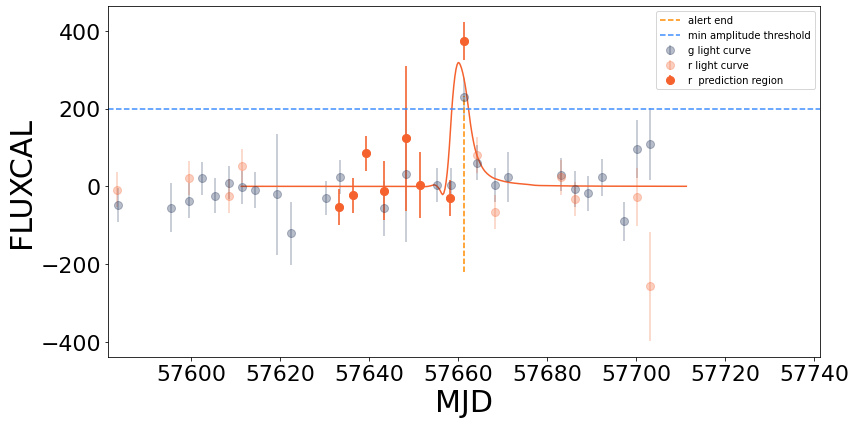

True
should print


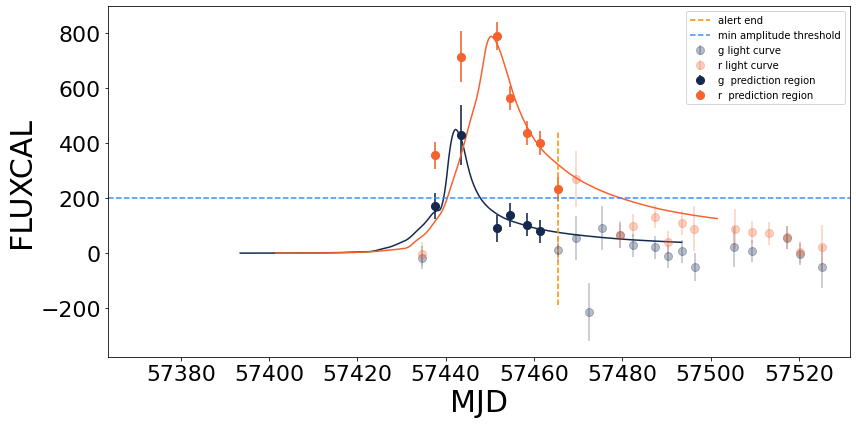

True
should print


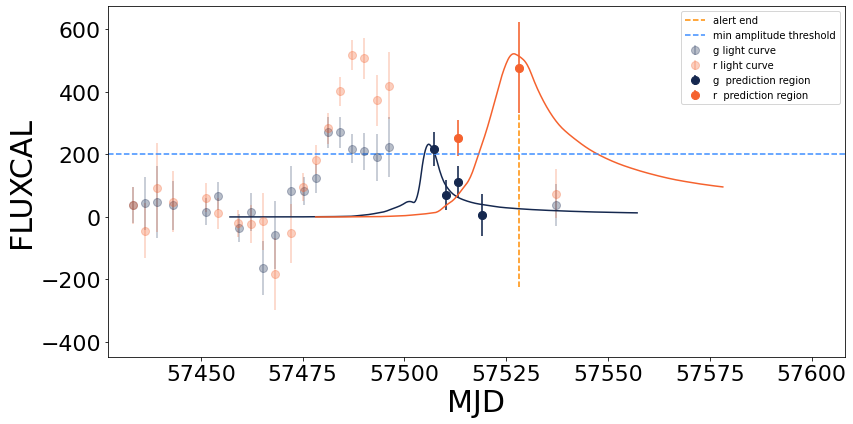

True
should print


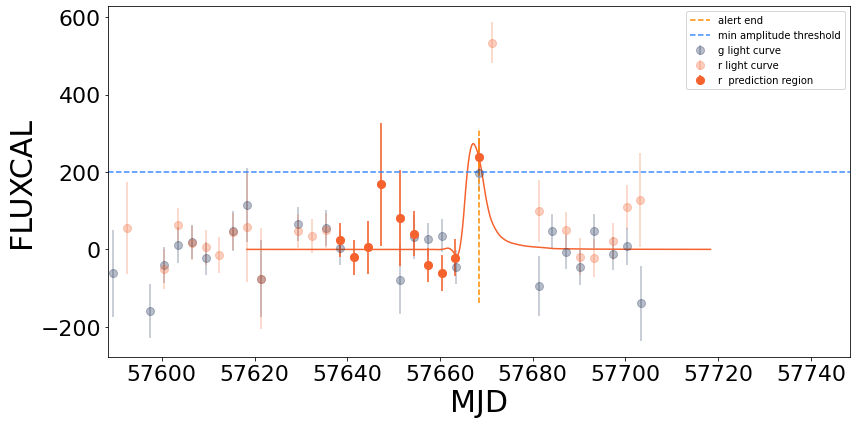

True
should print


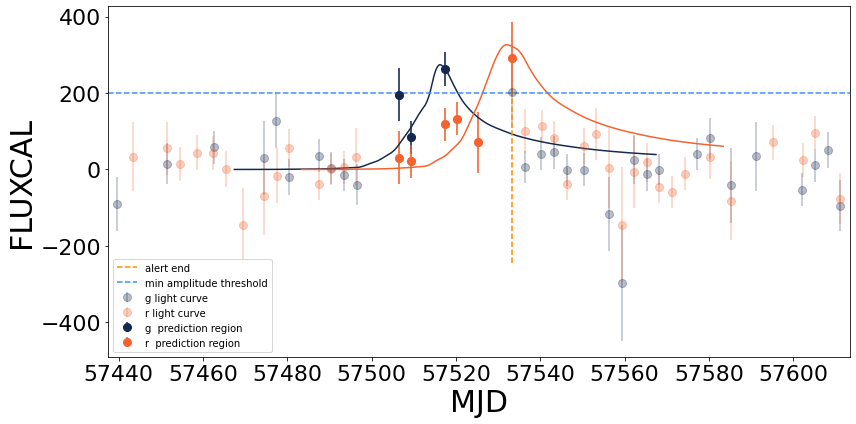

True
should print


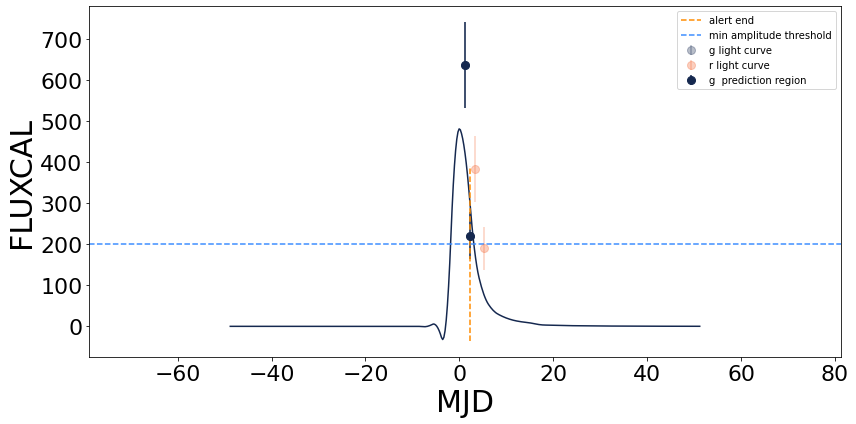

True
should print


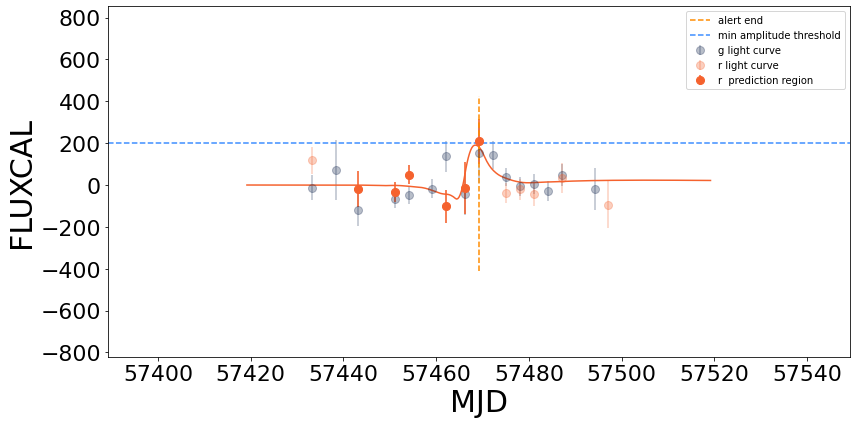

True
should print


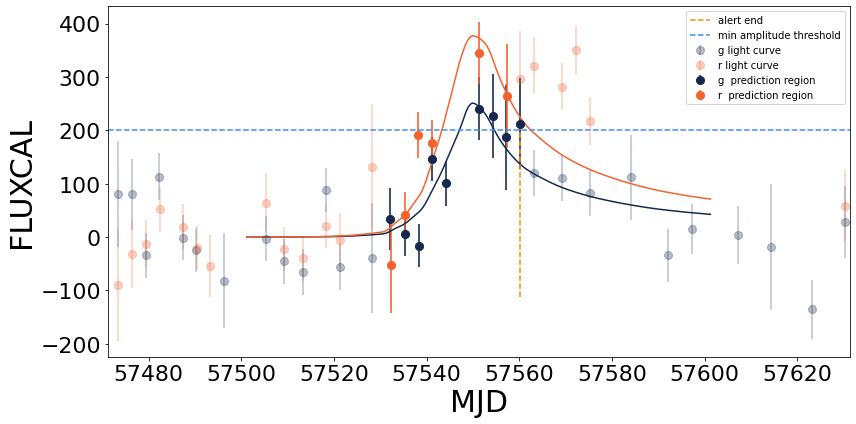

True
should print


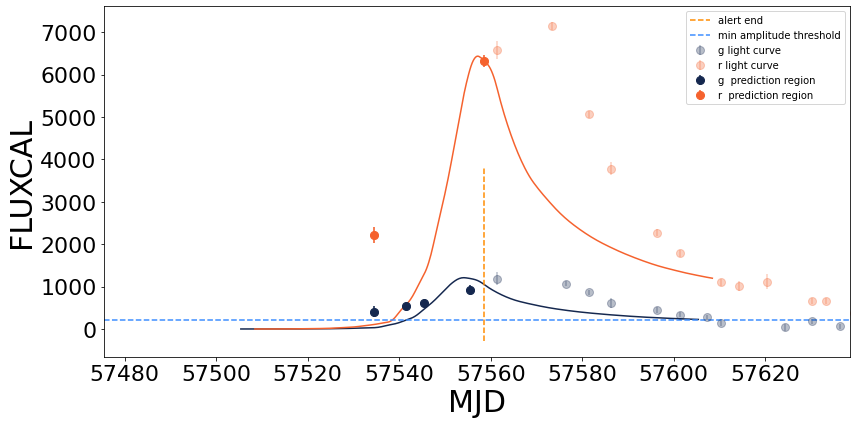

True
should print


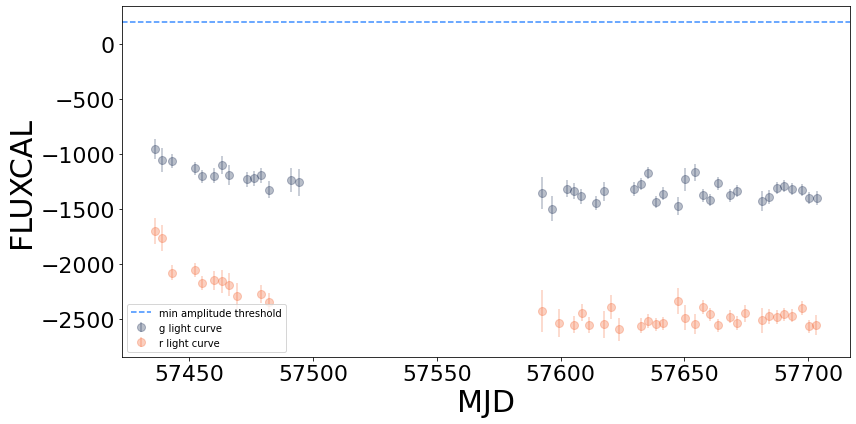

True
should print


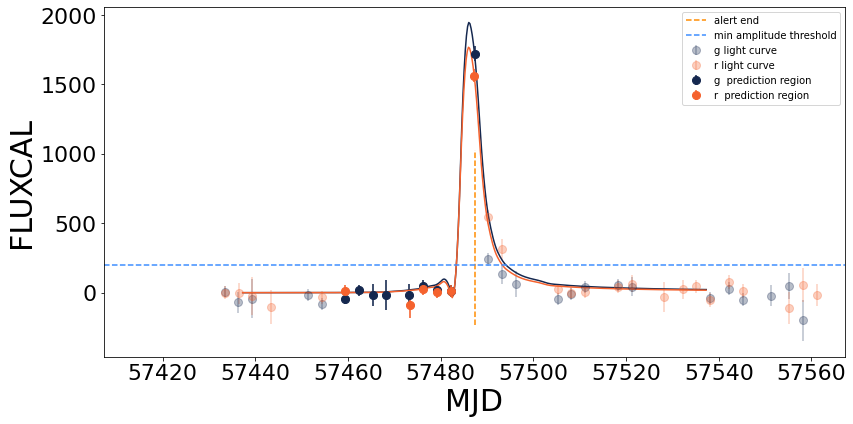

True
should print


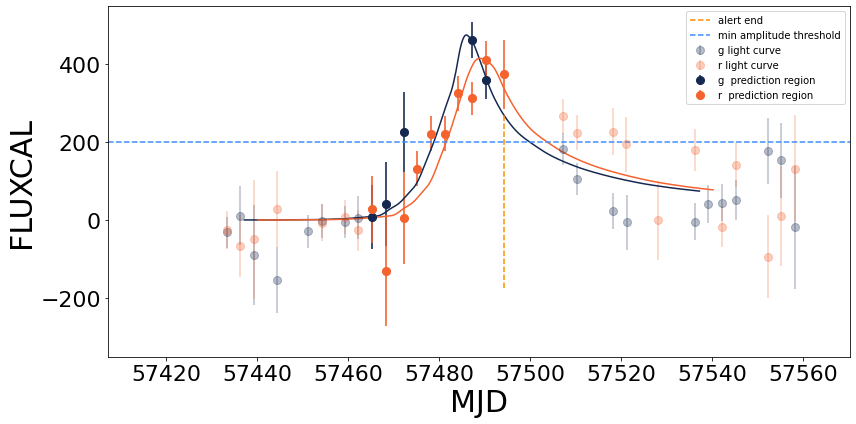

True
should print


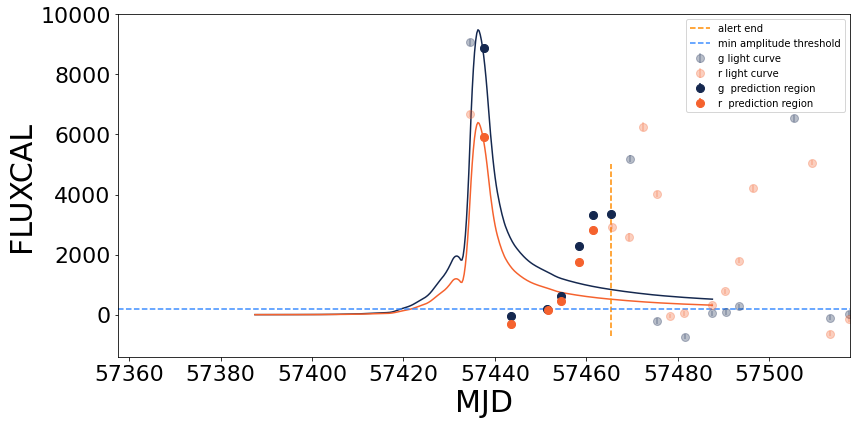

True
should print


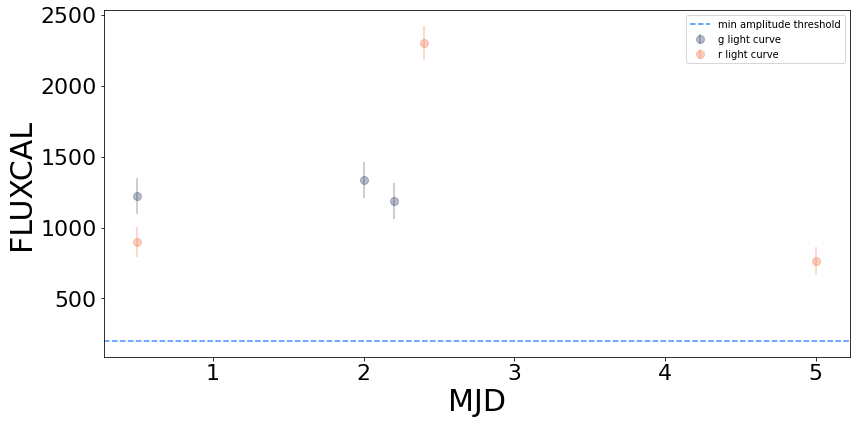

True
should print


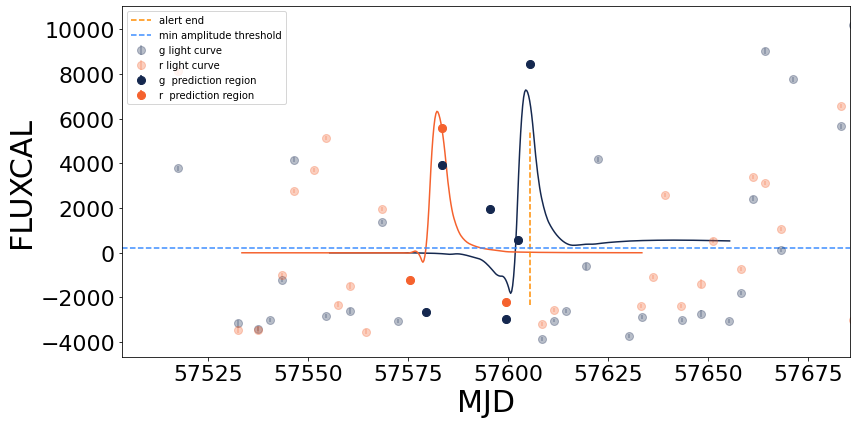

True
should print


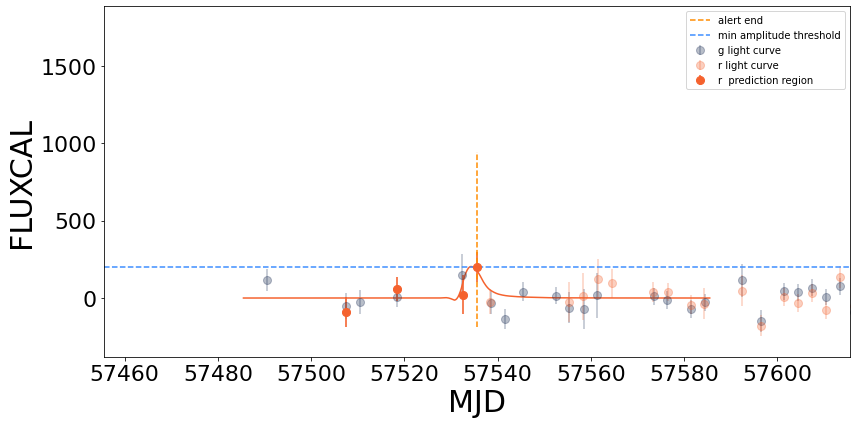

True
should print


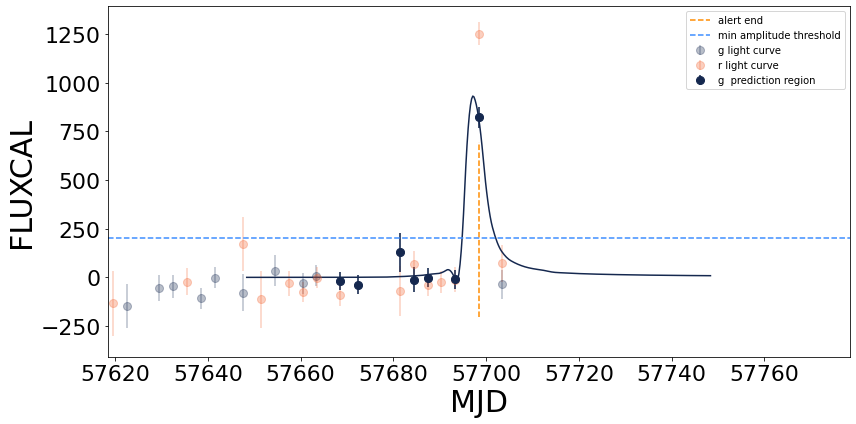

True
should print


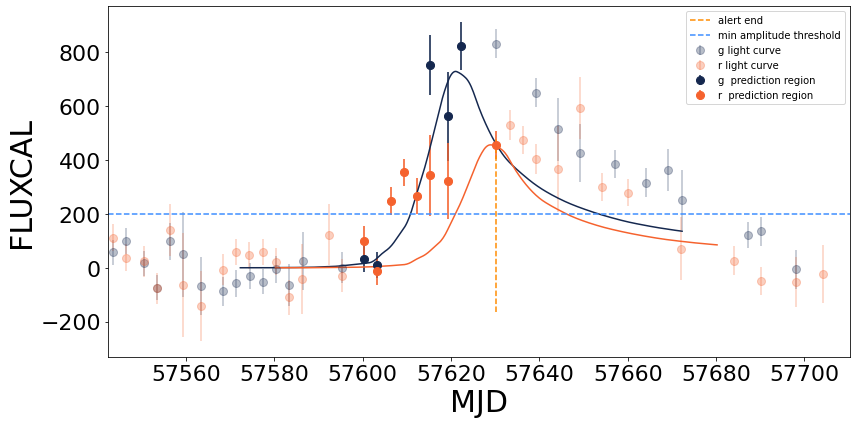

True
should print


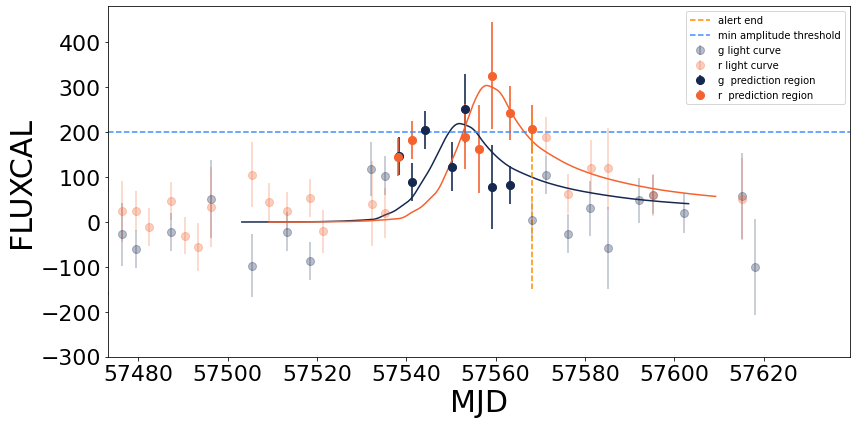

True
should print


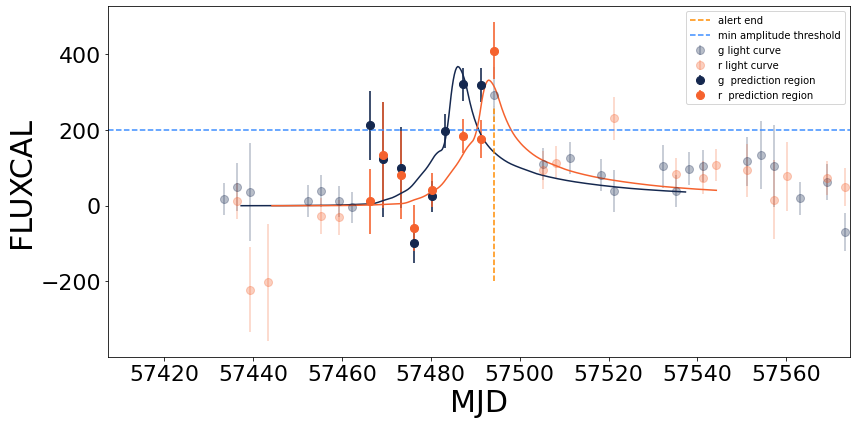

In [11]:
from kndetect.plot_lightcurve import plot_predicted_bands
color_band_dict = {b'g': '#15284F', b'r': '#F5622E'}
count = 0
for _, object_features in train_features_df.iterrows():
    snid = object_features["key"]
    object_lc = df_phot[df_phot["SNID"]==snid]
    
    band_coeff_dict = get_band_coeff_dict(object_features)
    plot_predicted_bands(lc=object_lc, all_band_coeff_dict=band_coeff_dict, features=object_features, color_band_dict=color_band_dict, flux_lim=flux_lim, pcs=load_pcs(), band_map={b'r': 'r',b'g':'g'}, duration=30)
    plt.show()
    plt.close()
    count+=1
    if count==20:
        break

In [ ]:

for object_id in df_header['SNID'].values:
    lc = df_phot[df_phot['SNID'] == object_id]
    plot_light_curve(lc=lc, color_band_dict=color_band_dict, bands=[b'g', b'r'], band_map={b'r': 'r',b'g':'g'}, markers={b'r': 'o',b'g':'s'})
    plt.show()